<a href="https://colab.research.google.com/github/JaskarJeyabalan/Telco_Customer_Churn_Dataset/blob/main/Telco_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
from google.colab import files

In [ ]:
path = '/content/Telco_Customer_Churn_Dataset  (3).csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
len(df)

7043

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df[df['SeniorCitizen'] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df['SeniorCitizen'].head(5)

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['SeniorCitizen'].head(5)

,SeniorCitizen
0,No
1,No
2,No
3,No
4,No


In [ ]:
print(df['TotalCharges'].dtype)  # Should be float64
print(df['TotalCharges'].isna().sum())  # Number of NaNs introduced

object
0


In [ ]:
print(df.dtypes.value_counts())

object     19
int64       1
float64     1
Name: count, dtype: int64


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

data cleaning

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
def clean_dataframe(df):
  def clean_column(col):
    if col.dtype == 'object':
      # Strip whitespace and replace empty strings with NaN
      return col.str.strip().replace('', np.nan)
    elif pd.api.types.is_numeric_dtype(col):
      # Replace infinite values with NaN
      return col.replace([np.inf, -np.inf], np.nan)
    else:
      return col  # Leave other types untouched (e.g., datetime, bool)

  return df.apply(clean_column)
df = clean_dataframe(df)

In [ ]:
# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtypes

dtype('float64')

check duplicate

In [ ]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [ ]:
problem_rows = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(problem_rows[['customerID', 'TotalCharges']])

      customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN
3331  7644-OMVMY           NaN
3826  3213-VVOLG           NaN
4380  2520-SGTTA           NaN
5218  2923-ARZLG           NaN
6670  4075-WKNIU           NaN
6754  2775-SEFEE           NaN


In [ ]:
for col in df.select_dtypes(include='number'):
    print(f"{col}: {df[col].skew():.2f}")

tenure: 0.24
MonthlyCharges: -0.22
TotalCharges: 0.96


In [ ]:
df['TotalCharges'].median()

1397.475

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data Analysis

In [ ]:
# Create a copy to preserve original
df_encoded = df.copy()

# Drop customerID if present
customer_ids = df_encoded['customerID']
df_encoded.drop('customerID', axis=1, inplace=True)

df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(customer_ids.head())

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object


Task 1: Data Perproation

In [ ]:
# Create TenureGroup before encoding or splitting
max_tenure = df_encoded['tenure'].max()
last_bin = max(74, max_tenure + 1)
df_encoded['TenureGroup'] = pd.cut(df_encoded['tenure'], bins=[0, 12, 24, 36, 48, 60, 73, last_bin],
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-73', '74+'], right = False)

# Encode binary categorical columns

binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode remaining object columns
remaining_cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=remaining_cat_cols, drop_first=True)

# Split dataset
def split_dataset(df_encoded, target_column = 'Churn', drop_columns = None, test_size=0.2, random_state=42):
  X = df_encoded.drop(drop_columns, axis=1)
  y = df_encoded[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_dataset(df_encoded, drop_columns=['Churn','TenureGroup'])


Task 2: Exploratory Data Analysis (EDA)

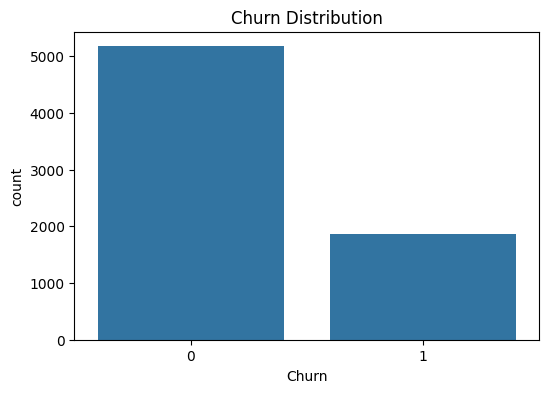

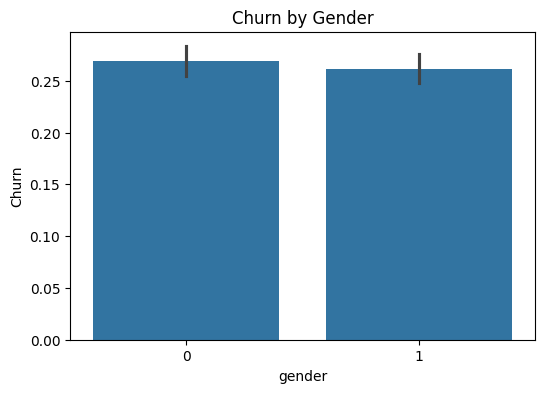

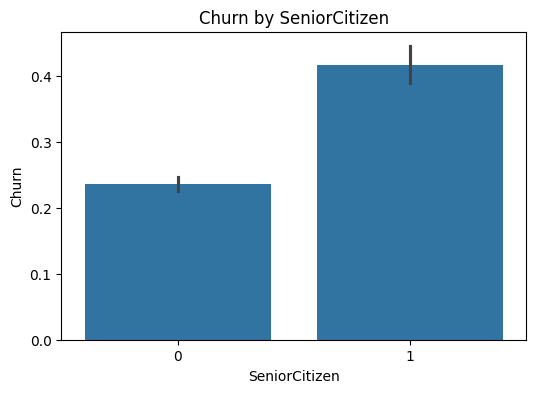

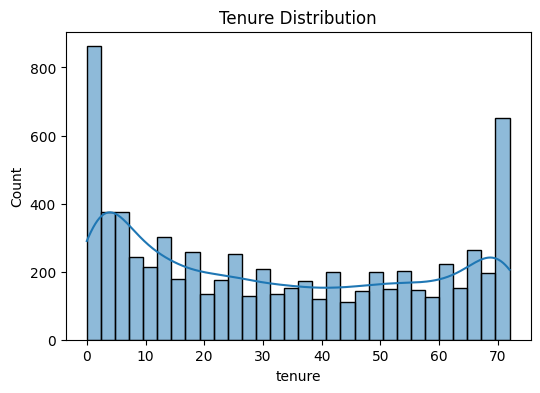

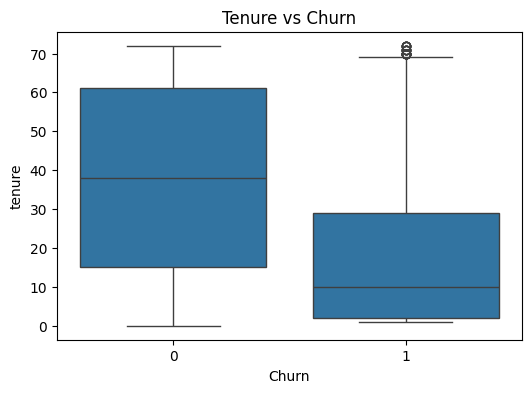

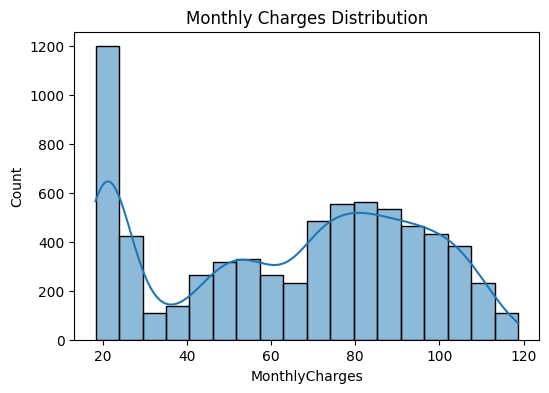

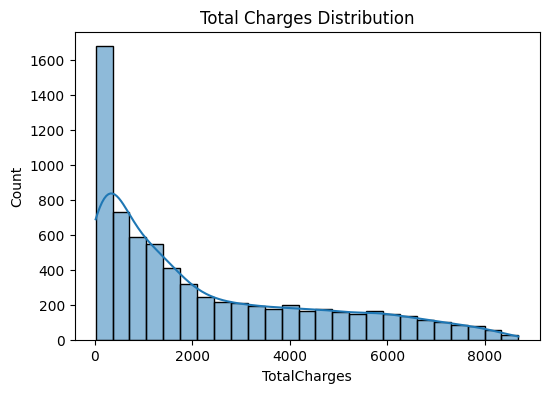

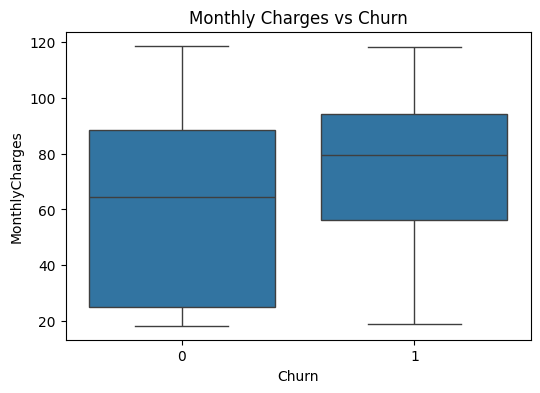

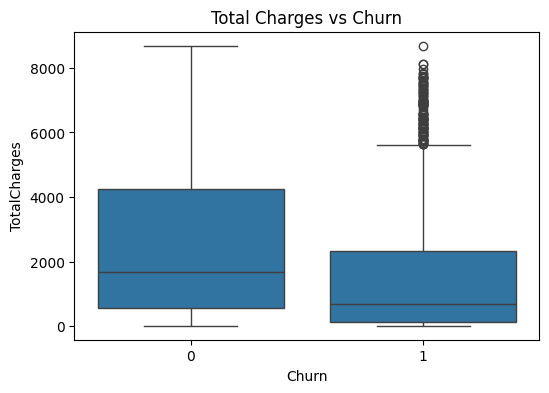

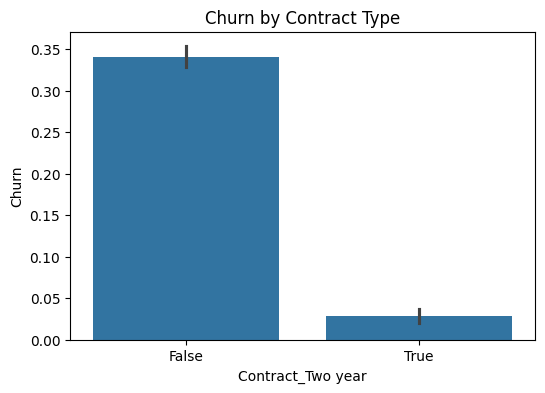

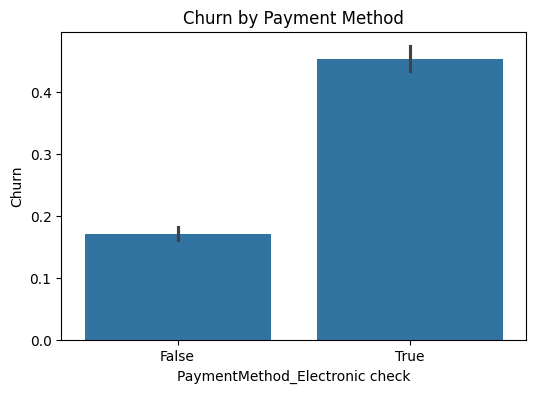

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_encoded)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='Churn', data=df_encoded)
plt.title("Churn by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='SeniorCitizen', y='Churn', data=df_encoded)
plt.title("Churn by SeniorCitizen")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_encoded['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title("Tenure vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_encoded['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_encoded['TotalCharges'], kde=True)
plt.title("Total Charges Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_encoded)
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=df_encoded)
plt.title("Total Charges vs Churn")
plt.show()

# Churn by Contract Type & Payment Method

if 'Contract_Two year' in df_encoded.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Contract_Two year', y='Churn', data=df_encoded)
    plt.title("Churn by Contract Type")
    plt.show()

if 'PaymentMethod_Electronic check' in df_encoded.columns:
  plt.figure(figsize=(6, 4))
  sns.barplot(x='PaymentMethod_Electronic check', y='Churn', data=df_encoded)
  plt.title("Churn by Payment Method")
  plt.show()


Task 3: Customer Segmentation

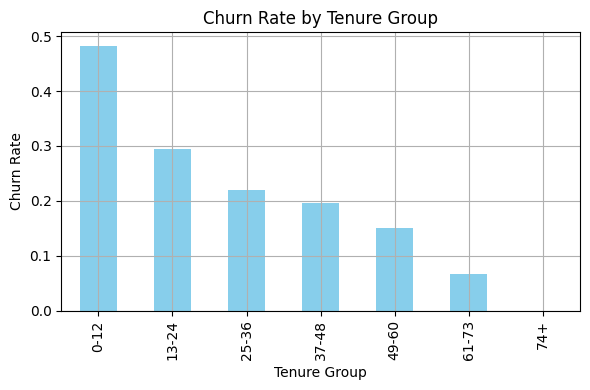

Churn Rate by Tenure Group:
 TenureGroup
0-12                       0.482842
13-24                      0.295129
25-36                       0.22032
37-48                      0.195187
49-60                          0.15
61-73                      0.066757
74+      No customers in this group
Name: Churn, dtype: object


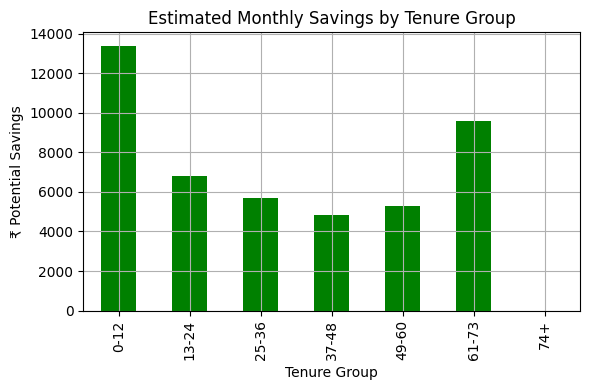

Estimated Monthly Savings from Retention Efforts: ₹13399.19


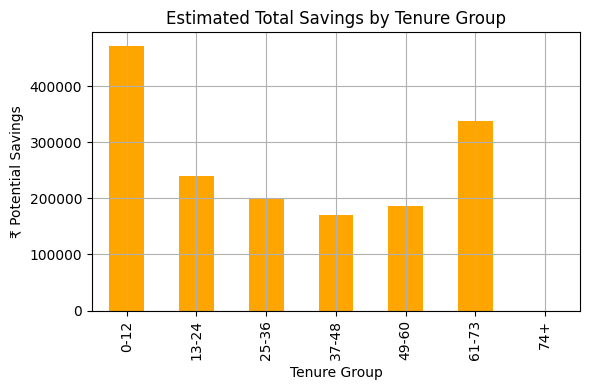

Estimated Total Savings from Retention Efforts: ₹472128.61


In [ ]:
# Customer Segmentation

segment_churn = df_encoded.groupby('TenureGroup', observed=False)['Churn'].mean()

plt.figure(figsize=(6, 4))
segment_churn.plot(kind='bar', color='skyblue')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.show()

segment_churn_display = segment_churn.copy()
segment_churn_display = segment_churn_display.fillna("No customers in this group")
print("Churn Rate by Tenure Group:\n", segment_churn_display)

avg_monthly_charge = df_encoded['MonthlyCharges'].mean()
savings_by_group = df_encoded.groupby('TenureGroup', observed=False).size() * avg_monthly_charge * 0.1
short_tenure_customers = df_encoded[df_encoded['TenureGroup'] == '0-12']
estimated_savings = avg_monthly_charge * len(short_tenure_customers) * 0.1

plt.figure(figsize=(6, 4))
savings_by_group.plot(kind='bar', color='green')
plt.title("Estimated Monthly Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Estimated Monthly Savings from Retention Efforts: ₹{estimated_savings:.2f}")

avg_total_charge = df_encoded['TotalCharges'].mean()
savings_by_group_long = df_encoded.groupby('TenureGroup', observed=False).size() * avg_total_charge * 0.1
long_tenure_customers = df_encoded[df_encoded['TenureGroup'] == '0-12']
estimated_total_savings = avg_total_charge * len(long_tenure_customers) * 0.1

plt.figure(figsize=(6, 4))
savings_by_group_long.plot(kind='bar', color='orange')
plt.title("Estimated Total Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Estimated Total Savings from Retention Efforts: ₹{estimated_total_savings:.2f}")

df_encoded['EstimatedSavings'] = df_encoded['MonthlyCharges'] * 0.1 + df_encoded['TotalCharges'] * 0.05

Task 4: Churn Prediction Model

In [ ]:
# Churn Prediction Model
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Churn Prediction Model Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

# Churn Prediction Model Decision Tree

model = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 5, 7, 10]}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)
y_dt_pred = grid.predict(X_test)

# Churn Prediction Model Random Forest Comparison

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

#CalibratedClassifierCV
calibrated_rf = CalibratedClassifierCV(rf, cv=5)
calibrated_rf.fit(X_train, y_train)
y_rf_prob = calibrated_rf.predict_proba(X_test)[:, 1]

# Models that need scaling
models_scaled = {"Logistic Regression": LogisticRegression(max_iter=5000)}

# Models that do NOT need scaling
models_unscaled = {"Decision Tree": grid,"Random Forest": rf,"Calibrated RF": CalibratedClassifierCV(rf, cv=5)}


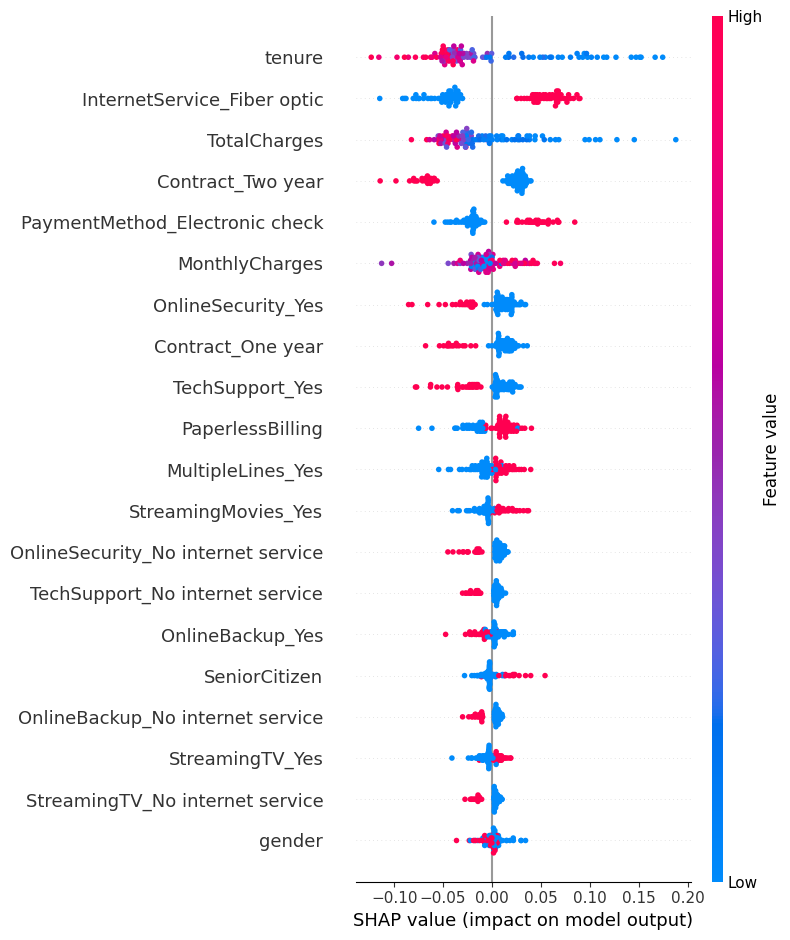

In [ ]:
# Shap sample indices
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
sample_indices = np.random.choice(X_test.shape[0], size=100, replace=False)

# Sample data and SHAP values together
X_sample = X_test.iloc[sample_indices]
shap_values_class_1 = shap_values[sample_indices, :, 1]

# Plot summary
shap.summary_plot(shap_values_class_1, X_sample, show=False)
plt.tight_layout()
plt.savefig("shap_summary.png")


Task 5: Model Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Logistic Regression Confusion Matrix:
[[933 103]
 [151 222]]
Logistic Regression AUC Score: 0.86
Logistic Regression Accuracy: 0.82
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409

Decision Tree Confusion Matrix:
[[964  72]
 [201 172]]
Decision Tree AUC Score: 0.85
Decision Tree Accuracy: 0.81
Random Forest Classi

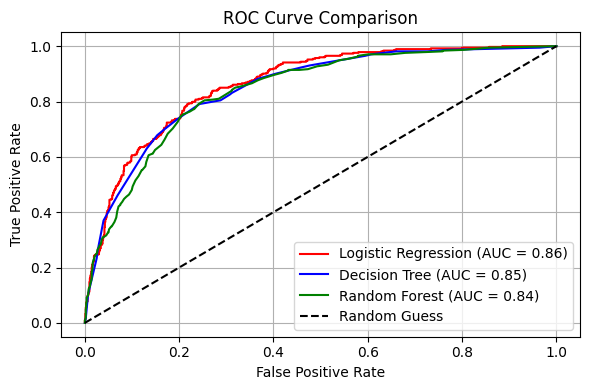

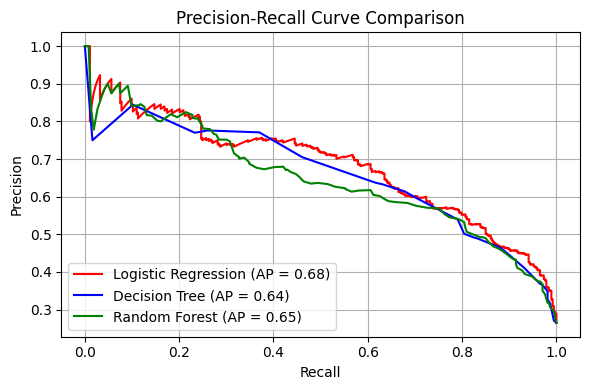

In [ ]:
# Model Evaluation

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)

  print(f"{model_name} Classification Report:")
  print(classification_report(y_test, y_pred))
  print(f"{model_name} Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print(f"{model_name} AUC Score: {roc_auc:.2f}")
  print(f"{model_name} Accuracy: {model.score(X_test, y_test):.2f}")
  return model_name, roc_auc, accuracy_score(y_test, y_pred)

results = []

# Scaled models
for name, model in models_scaled.items():
    results.append(train_and_evaluate(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name=name))

# Unscaled models
for name, model in models_unscaled.items():
    results.append(train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name=name))

summary_df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy"])
summary_df.to_excel("model_comparison.xlsx", index=False)

def get_confusion_details(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return pd.Series({
        "True Positives": tp,
        "False Positives": fp,
        "False Negatives": fn,
        "True Negatives": tn
    })

confusion_details = pd.DataFrame({
    "Logistic Regression": get_confusion_details(y_test, y_lr_pred),
    "Decision Tree": get_confusion_details(y_test, y_dt_pred),
    "Random Forest": get_confusion_details(y_test, y_rf_pred)
})

confusion_details.to_excel("confusion_breakdown.xlsx")

# ROC Curve
# Logistic Regression
lr.fit(X_train, y_train)
y_lr_prob = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_lr_prob)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree ROC
y_dt_prob = grid.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_dt_prob)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest ROC
y_rf_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rf_prob)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting both ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_comparison.png")
plt.show()

def plot_pr_curve(y_true, y_probs, label, color):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    avg_prec = average_precision_score(y_true, y_probs)
    plt.plot(recall, precision, label=f"{label} (AP = {avg_prec:.2f})", color=color)

plt.figure(figsize=(6, 4))
plot_pr_curve(y_test, y_lr_prob, "Logistic Regression", "red")
plot_pr_curve(y_test, y_dt_prob, "Decision Tree", "blue")
plot_pr_curve(y_test, y_rf_prob, "Random Forest", "green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_recall_curve.png")
plt.show()


AUC Scores:
Logistic Regression AUC: 0.86
Decision Tree AUC: 0.85
Random Forest AUC: 0.84
Accuracy Scores:
Logistic Regression Accuracy: 0.82
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.79
Precision Scores:
Logistic Regression Precision: 0.68
Decision Tree Precision: 0.70
Random Forest Precision: 0.65
Recall Scores:
Logistic Regression Recall: 0.60
Decision Tree Recall: 0.46
Random Forest Recall: 0.46
F1 Scores:
Logistic Regression F1 Score: 0.64
Decision Tree F1 Score: 0.56
Random Forest F1 Score: 0.54
Support:
Logistic Regression Support: 1409
Decision Tree Support: 1409
Random Forest Support: 1409


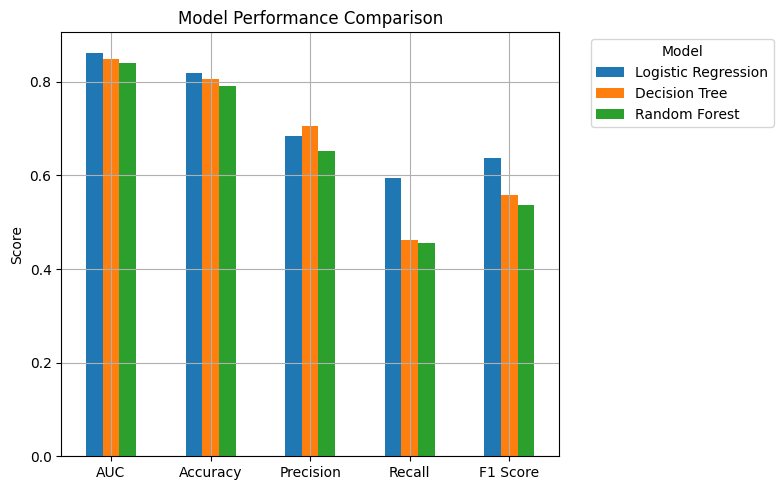

In [ ]:
# AUC Scores
auc_lr = auc(*roc_curve(y_test, y_lr_prob)[:2])
auc_dt = auc(*roc_curve(y_test, y_dt_prob)[:2])
auc_rf = auc(*roc_curve(y_test, y_rf_prob)[:2])
print(f"AUC Scores:\nLogistic Regression AUC: {auc_lr:.2f}\nDecision Tree AUC: {auc_dt:.2f}\nRandom Forest AUC: {auc_rf:.2f}")

# Accuracy Scores
acc_lr = accuracy_score(y_test, y_lr_pred)
acc_dt = accuracy_score(y_test, y_dt_pred)
acc_rf = accuracy_score(y_test, y_rf_pred)
print(f"Accuracy Scores:\nLogistic Regression Accuracy: {acc_lr:.2f}\nDecision Tree Accuracy: {acc_dt:.2f}\nRandom Forest Accuracy: {acc_rf:.2f}")

# Precision Score
prec_lr = precision_score(y_test, y_lr_pred)
prec_dt = precision_score(y_test, y_dt_pred)
prec_rf = precision_score(y_test, y_rf_pred)
print(f"Precision Scores:\nLogistic Regression Precision: {prec_lr:.2f}\nDecision Tree Precision: {prec_dt:.2f}\nRandom Forest Precision: {prec_rf:.2f}")

# Recall Score
rec_lr = recall_score(y_test, y_lr_pred)
rec_dt = recall_score(y_test, y_dt_pred)
rec_rf = recall_score(y_test, y_rf_pred)
print(f"Recall Scores:\nLogistic Regression Recall: {rec_lr:.2f}\nDecision Tree Recall: {rec_dt:.2f}\nRandom Forest Recall: {rec_rf:.2f}")

#  F1 Score
f1_lr = f1_score(y_test, y_lr_pred)
f1_dt = f1_score(y_test, y_dt_pred)
f1_rf = f1_score(y_test, y_rf_pred)
print(f"F1 Scores:\nLogistic Regression F1 Score: {f1_lr:.2f}\nDecision Tree F1 Score: {f1_dt:.2f}\nRandom Forest F1 Score: {f1_rf:.2f}")

# Support
support_lr = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
support_dt = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
support_rf = len(y_test[y_test == 0]) + len(y_test[y_test == 1])
print(f"Support:\nLogistic Regression Support: {support_lr}\nDecision Tree Support: {support_dt}\nRandom Forest Support: {support_rf}")

# Summary Table
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'AUC': [auc_lr, auc_dt, auc_rf],
    'Accuracy': [acc_lr, acc_dt, acc_rf],
    'Precision': [prec_lr, prec_dt, prec_rf],
    'Recall': [rec_lr, rec_dt, rec_rf],
    'F1 Score': [f1_lr, f1_dt, f1_rf],
    'Support': [support_lr, support_dt, support_rf]
})

# Transpose for plotting
summary_plot = summary.set_index('Model').T


# Transpose confusion_details to match summary format
confusion_transposed = confusion_details.T.reset_index().rename(columns={'index': 'Model'})

# Merge on 'Model'
merged_summary = pd.merge(summary, confusion_transposed, on='Model')

# Export to Excel
merged_summary.to_excel("merged_model_summary.xlsx", index=False)

# Plot
summary_plot.drop(index='Support').plot(kind='bar', figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.savefig("model_performance_bar_chart.png")
plt.show()


    Threshold  Precision    Recall        F1  Support
0        0.00   0.264727  1.000000  0.418631     1409
1        0.05   0.340824  0.975871  0.505205     1409
2        0.10   0.380749  0.954424  0.544343     1409
3        0.15   0.432193  0.914209  0.586919     1409
4        0.20   0.462518  0.876676  0.605556     1409
5        0.25   0.502471  0.817694  0.622449     1409
6        0.30   0.552326  0.764075  0.641170     1409
7        0.35   0.583524  0.683646  0.629630     1409
8        0.40   0.602067  0.624665  0.613158     1409
9        0.45   0.622356  0.552279  0.585227     1409
10       0.50   0.640741  0.463807  0.538103     1409
11       0.55   0.679654  0.420912  0.519868     1409
12       0.60   0.703911  0.337802  0.456522     1409
13       0.65   0.746753  0.308311  0.436433     1409
14       0.70   0.781513  0.249330  0.378049     1409
15       0.75   0.821053  0.209115  0.333333     1409
16       0.80   0.805195  0.166220  0.275556     1409
17       0.85   0.846154  0.

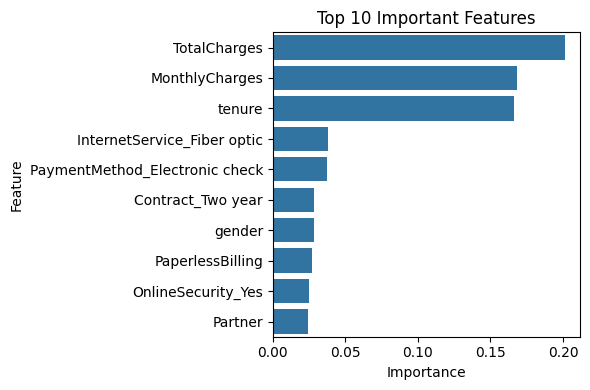

Top 10 Important Features:
                           Feature  Importance
8                     TotalCharges    0.201664
7                   MonthlyCharges    0.168213
4                           tenure    0.166581
11     InternetService_Fiber optic    0.038111
28  PaymentMethod_Electronic check    0.037589
26               Contract_Two year    0.028556
0                           gender    0.028467
6                 PaperlessBilling    0.027050
14              OnlineSecurity_Yes    0.024978
2                          Partner    0.023973


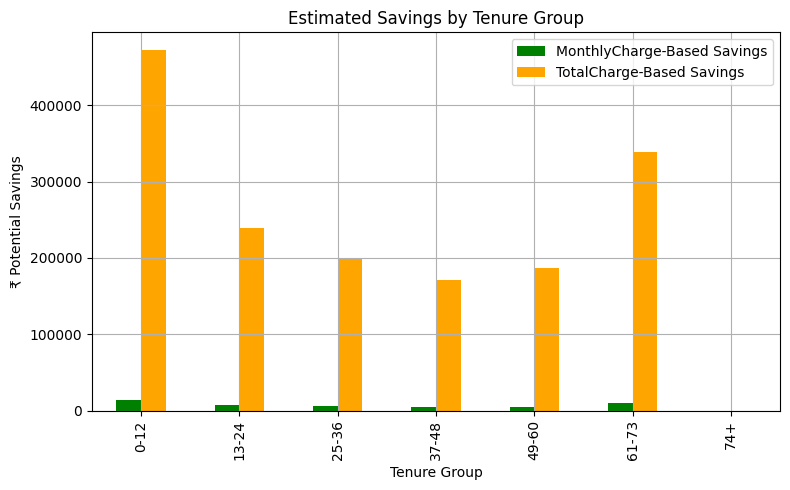

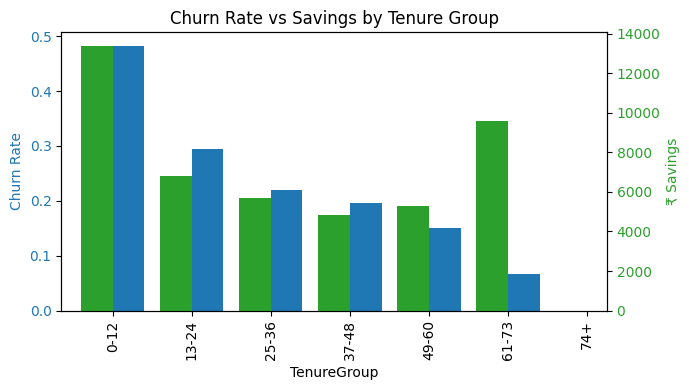

   TenureGroup RetentionRate        MonthlyChargeSavings  \
0         0-12            5%                    ₹6699.60   
1        13-24            5%                    ₹3390.27   
2        25-36            5%                    ₹2836.56   
3        37-48            5%                    ₹2422.09   
4        49-60            5%                    ₹2655.23   
5        61-73            5%                    ₹4802.08   
6          74+            5%  No customers in this group   
7         0-12           10%                   ₹13399.19   
8        13-24           10%                    ₹6780.55   
9        25-36           10%                    ₹5673.12   
10       37-48           10%                    ₹4844.17   
11       49-60           10%                    ₹5310.46   
12       61-73           10%                    ₹9604.16   
13         74+           10%  No customers in this group   
14        0-12           15%                   ₹20098.79   
15       13-24           15%            

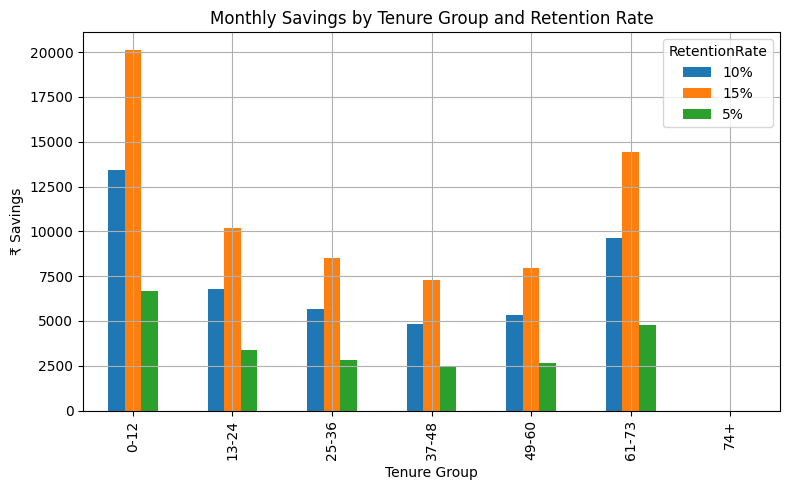

In [ ]:
# Threshold Analysis Table
def threshold_metrics(y_true, y_probs, thresholds=np.arange(0.0, 1.01, 0.05)):
    results = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        support = len(y_test[y_test == 0]) + len(y_test[y_test == 1]) if len(y_test[y_test == 0]) + len(y_test[y_test == 1]) > 0 else 0
        results.append((thresh, precision, recall, f1, support))

    df_thresh = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "Support"])
    df_thresh.to_excel("threshold_analysis.xlsx", index=False)
    return df_thresh

# Run for Random Forest
threshold_df = threshold_metrics(y_test, y_rf_prob)
print(threshold_df)

# Feature Importance

importances = rf.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()
print("Top 10 Important Features:")
print(feature_df.sort_values(by='Importance', ascending=False).head(10))

# Revenue Impact Estimate

# Combine into DataFrame
savings_df = pd.DataFrame({
    'MonthlyCharge-Based Savings': savings_by_group,
    'TotalCharge-Based Savings': savings_by_group_long
})

# Plot
savings_df.plot(kind='bar', figsize=(8, 5), color=['green', 'orange'])
plt.title("Estimated Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(7, 4))

color = 'tab:blue'
ax1.set_xlabel('Tenure Group')
ax1.set_ylabel('Churn Rate', color=color)
segment_churn.plot(kind='bar', ax=ax1, color=color, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('₹ Savings', color=color)
savings_by_group.plot(kind='bar', ax=ax2, color=color, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Churn Rate vs Savings by Tenure Group")
plt.tight_layout()
plt.show()

# Calculate averages
avg_monthly = df_encoded['MonthlyCharges'].mean()
avg_total = df_encoded['TotalCharges'].mean()

# Define retention rates and tenure groups
retention_rates = [0.05, 0.10, 0.15]
tenure_order = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-73', '74+']

# Build combined savings table
combined_rows = []
for rate in retention_rates:
    for group in tenure_order:
        group_size = df_encoded[df_encoded['TenureGroup'] == group].shape[0]
        if group_size > 0:
            monthly_savings = avg_monthly * group_size * rate
            total_savings = avg_total * group_size * rate
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': f'₹{monthly_savings:.2f}',
                'TotalChargeSavings': f'₹{total_savings:.2f}'
            })
        else:
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': 'No customers in this group',
                'TotalChargeSavings': 'No customers in this group'
            })

# Create DataFrame and display
combined_df = pd.DataFrame(combined_rows)
print(combined_df)

combined_df.to_excel("combined_savings_summary.xlsx", index=False)

# Load combined savings summary
combined_df = pd.read_excel("combined_savings_summary.xlsx")

# Convert savings columns to numeric (remove ₹ and commas)
combined_df['MonthlyChargeSavings'] = combined_df['MonthlyChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)
combined_df['TotalChargeSavings'] = combined_df['TotalChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)

# Pivot for grouped bar chart
pivot_df = combined_df.pivot(index='TenureGroup', columns='RetentionRate', values='MonthlyChargeSavings')

# Plot
pivot_df.plot(kind='bar', figsize=(8, 5))
plt.title("Monthly Savings by Tenure Group and Retention Rate")
plt.ylabel("₹ Savings")
plt.xlabel("Tenure Group")
plt.grid(True)
plt.tight_layout()
plt.savefig("savings_grouped_bar_chart.png")
plt.show()


Task 6: Business Recommendations

In [ ]:
# Business Recommendations

print("Business Recommendations:")
print("Focus retention efforts on customers with short tenure (0–12 months).")
print("Offer incentives for long-term contracts to reduce churn.")
print("Target high monthly charge customers with loyalty programs.")
print("Improve service quality for customers using fiber or DSL.")

Business Recommendations:
Focus retention efforts on customers with short tenure (0–12 months).
Offer incentives for long-term contracts to reduce churn.
Target high monthly charge customers with loyalty programs.
Improve service quality for customers using fiber or DSL.


In [ ]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image as XLImage

wb = Workbook()
wb.remove(wb.active)

# Add data sheets
for file_name, sheet_name in [
    ("merged_model_summary.xlsx", "Model Summary"),
    ("confusion_breakdown.xlsx", "Confusion Matrix"),
    ("threshold_analysis.xlsx", "Threshold Analysis"),
    ("combined_savings_summary.xlsx", "Savings Summary")
]:
    temp_wb = load_workbook(file_name)
    temp_ws = temp_wb.active
    new_ws = wb.create_sheet(title=sheet_name)
    for row in temp_ws.iter_rows(values_only=True):
        new_ws.append(row)

# Add charts
for img_file, sheet_name in [
    ("roc_curve_comparison.png", "ROC Curve"),
    ("precision_recall_curve.png", "PR Curve"),
    ("shap_summary.png", "SHAP Summary"),
    ("savings_grouped_bar_chart.png", "Savings Chart"),
    ("model_performance_bar_chart.png", "Performance Chart")
]:
    ws = wb.create_sheet(title=sheet_name)
    img = XLImage(img_file)
    ws.add_image(img, "B2")

# Add business recommendations
recommendations = [
    "Focus retention efforts on customers with short tenure (0–12 months).",
    "Offer incentives for long-term contracts to reduce churn.",
    "Target high monthly charge customers with loyalty programs.",
    "Improve service quality for customers using fiber or DSL."
]
ws = wb.create_sheet(title="Recommendations")
ws.append(["Business Recommendations"])
for rec in recommendations:
    ws.append([rec])

# Save and download
wb.save("dashboard_summary.xlsx")
files.download("dashboard_summary.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>